# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [2]:
# input_1 = np.array([[0,1,0],[0,1,0],[0,1,0]])
# input_2 = np.array([[1,1,1],[0,1,0],[1,1,1]])
# input_3 = np.array([[1,1,1],[0,0,1],[0,0,1]])
# input_4 = np.array([[1,0,1],[1,1,1],[0,0,1]])

# MNIST Data Download and Processing

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [5]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Filtering the Data (0,1,2,3,4)

In [6]:
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))

In [7]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

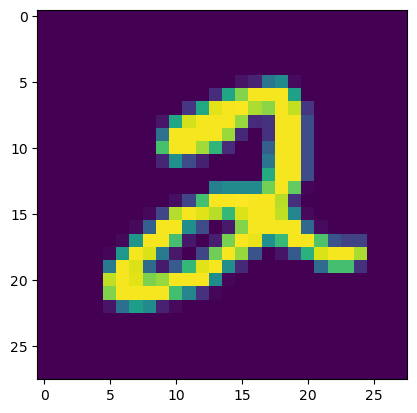

In [8]:
plt.imshow(X_train[3])

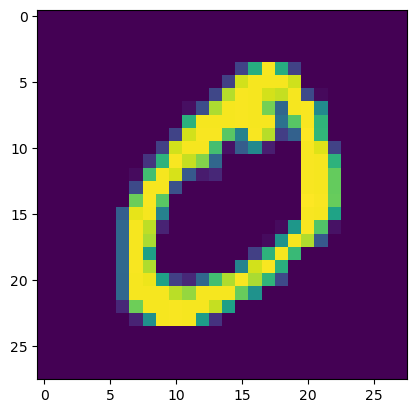

In [9]:
plt.imshow(X_train[0])

In [10]:
np.unique(X_train[0])

array([  0,   6,   7,  10,  12,  19,  21,  25,  28,  29,  37,  38,  47,
        48,  50,  51,  54,  56,  57,  60,  63,  71,  75,  76,  79,  84,
        85,  86,  96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145,
       146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189,
       190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228,
       229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255],
      dtype=uint8)

# MNIST Data Information

In [11]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (30596, 28, 28)
Y_train: (30596,)
X_test:  (5139, 28, 28)
Y_test:  (5139,)


# Normalize the Images

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
X_train[1].shape

(28, 28)

# Flattening the Input

In [14]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

flattenInput_ = flattenInput(input_1)

NameError: name 'input_1' is not defined

In [15]:
flattenInput_.shape

NameError: name 'flattenInput_' is not defined

# Weight Initialization(Random,Normalized)

In [16]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [17]:
weights = weightInitialization(784,20,"random")

In [18]:
weights.shape

(784, 20)

# Manipulating the Array

In [553]:
def manipulatingTheArray(mat):
    mat = flattenInput(mat)
    
    for index in range(mat.shape[0]):    
        if mat[index] == 0:
            mat[index] = -1
    return mat

In [554]:
manipulatingTheArray(input_1)

array([[-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1]])

# Thresholding Weight

In [555]:
def thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

In [556]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
        else:
            out[0][item] = 0.1
    return out

# Threshold Check

In [557]:
def crossThreshold(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            return True

    return False

# Weight Threshold (Future Reference)

In [558]:
def weightThreshold(weight):
    for item in range(weight.shape[1]):
        if weight[0][item] <= 0:
            weight[0][item] = 0
    
    return weight
            

# Print Results

In [559]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight))
    return result

In [560]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)




# Weight Update

In [561]:
def weightUpateContainingMemoryElement(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out = np.array(0)
    alpha =1e-4
    beta = 1e-5
    for epoch_ in range(epoch):
            for input_ in flattenImage:
                    out = alpha * np.dot(input_.T , weight) + out
                    out = ActThresholding(out)
                    inputM = manipulatingTheArray(input_)
                    weight = weight + beta * np.dot(inputM,out)
                    weight = weightThreshold(weight)
                    if(crossThreshold(out)):
                        out = 0
                    else:
                        out = out - 0.1
    return weight

In [562]:
finalWeight = weightUpateContainingMemoryElement(3,1,X_train,weights)

In [563]:
finalWeight

array([[ 0.71699847,  0.42683203,  0.19909667, ...,  0.17723817,
         0.49301317,  0.3696507 ],
       [ 0.64055101,  0.5234017 ,  0.04333012, ...,  0.02557459,
        -0.0672761 ,  0.14968823],
       [ 0.49722946,  0.32698053,  0.50525217, ..., -0.0441126 ,
         0.86506062,  0.19305701],
       ...,
       [ 0.89381857,  0.11620128,  0.65045717, ...,  0.40856457,
         0.74178992,  0.57545439],
       [ 0.08997719, -0.01173686,  0.74433771, ...,  0.51605582,
        -0.03698417,  0.1920063 ],
       [ 0.44743281,  0.81135575,  0.70950403, ...,  0.4649761 ,
         0.83309938,  0.61906041]])

In [564]:
results=printResults(X_train,finalWeight)

In [565]:
resultsAvg = []
for item in range(len(results)):
    resultsAvg.append(np.mean(results[item]))

In [566]:
res0 = []
res1 = []
res2 = []
res3 = []
res4 = []

index = 0

for item in Y_train: 
    if item == 0:
        res0.append(index)
    elif item == 1:
        res1.append(index)
    elif item == 2:
        res2.append(index)
    elif item == 3:
        res3.append(index)
    else:
        res4.append(
            index)
    index += 1
        

# Checking the values of Zeros

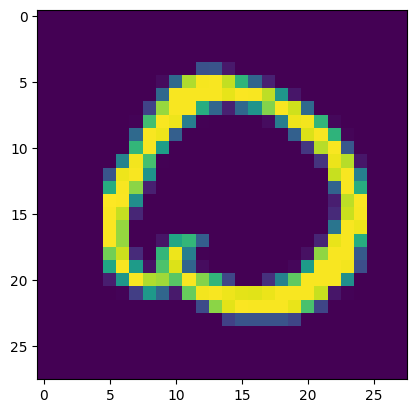

In [567]:
plt.imshow(X_train[res0[100]])

# Storing the index of the images

In [568]:

def storingIndexes(res0,res1,res2,res3,res4):
    result0 = []
    result1 = []
    result2 = []
    result3 = []
    result4 = []
    
    for index in res0:
        result0.append(resultsAvg[index])
    
    for index in res1:
        result1.append(resultsAvg[index])
        
    for index in res2:
        result2.append(resultsAvg[index])
    
    for index in res3:
        result3.append(resultsAvg[index])
    
    for index in res4:
        result4.append(resultsAvg[index])
        
    
    return result0,result1,result2,result3,result4
        

In [569]:
result0 , result1 , result2 , result3, result4 = storingIndexes(res0,res1,res2,res3,res4)

In [570]:
np.min(result0)

22.182178270307602

In [571]:
np.max(result0)

148.30960006722486

In [572]:
def MaxMinResult(res):
    return np.min(res) , np.max(res)

In [573]:
min0 , max0 = MaxMinResult(result0)
min1 , max1 = MaxMinResult(result1)
min2 , max2 = MaxMinResult(result2)
min3 , max3 = MaxMinResult(result3)
min4 , max4 = MaxMinResult(result4)

In [574]:
print(min0)
print(max0)

22.182178270307602
148.30960006722486


In [575]:
print(min1)
print(max1)

10.060199849009193
84.77926879463686


In [576]:
print(min2)
print(max2)

17.023349657700354
121.68607737311072


In [577]:
print(min3)
print(max3)

15.71253109258837
115.16812034586341


In [578]:
print(min4)
print(max4)

16.04609646622481
101.87317102790755


In [579]:
max_value = np.max(result0)
index = result0.index(max_value)
print(index)


4077


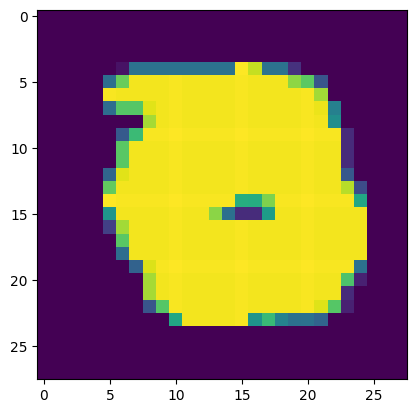

In [580]:
plt.imshow(X_train[res0[4077]])

In [581]:
max_value = np.min(result0)
index = result0.index(max_value)
print(index)


3525


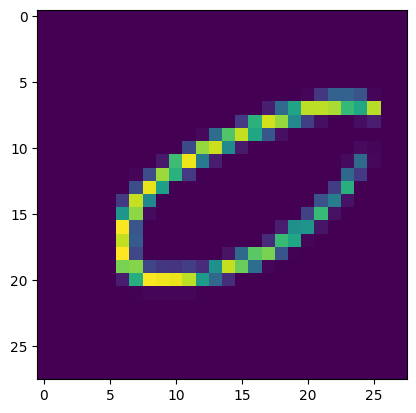

In [582]:
plt.imshow(X_train[res0[3525]])

In [584]:
np.mean(np.dot(testFlatten[0].T,finalWeight))

53.54726209114002

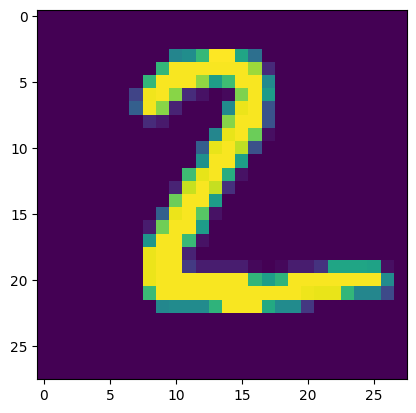

In [585]:
plt.imshow(X_test[0])

In [591]:
np.mean(np.dot(testFlatten[3].T,finalWeight))

35.34987058964693

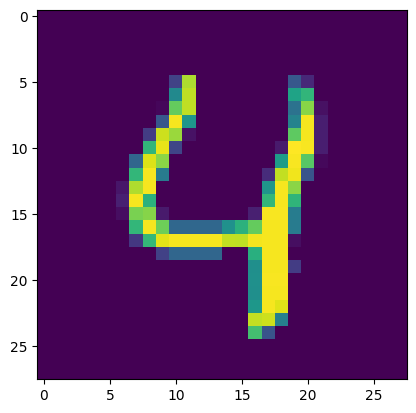

In [592]:
plt.imshow(X_test[3])

# Problem

1. Proper Encoding of the MNIST Data is required
2. Check the algorithm for previous data
    - The weight values are increasing
3. Thresholding on weights
4. If weights are increasing then the output will be increasing , we have to work on the the weight clipping.
5. Epochs 10
6. Digits 0-5 (20 output neurons)

In [47]:
def weightUpdate(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                input_ = manipulatingTheArray(input_)
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    #manipulatedinput = manipulatingTheArray(input_)
                    weight = weight + np.dot(input_, out)
                print(out)
            

In [48]:
weightUpdate(1,10,inputImage,weights)

[[0.8 0.8 0.8 0.8]]
[[0.8 0.8 0.8 0.8]]
[[0.8 0.1 0.1 0.1]]
[[0.1 0.1 0.1 0.1]]


# Experimenting with the Weight Update Function 

1. Without Thresholding

In [49]:
def weightUpdateNoThresholding(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    mInput = manipulatingTheArray(input_)
                    weight = weight + np.dot(mInput, out)
                print(out)
    
    #return weight

In [50]:
weightUpdateNoThresholding(1,10,inputImage,weights)

[[155576.39768674 385378.01137161 202981.67210939 450812.2380949 ]]
[[-2.78410072e+13 -6.89656659e+13 -3.63246339e+13 -8.06754756e+13]]
[[-9.61965288e+20 -2.38290864e+21 -1.25509241e+21 -2.78750716e+21]]
[[-9.31650470e+28 -2.30781503e+29 -1.21554015e+29 -2.69966328e+29]]


2. No Input Manipulation

In [33]:
def weightUpdateNoInputManipulation(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [38]:
finalWeights = weightUpdateNoInputManipulation(1,10,inputImage,weights)

In [41]:
printResults(inputImage,finalWeights)

[[-44.01405281 -40.88787408 -42.02877323 -40.81974185]]
[[121.46048886 121.38450421 121.14038429 122.29584165]]
[[58.267655   55.21240137 57.42401618 56.73500904]]
[[73.95550314 72.03892014 74.53764588 73.69424831]]


3. Do combined Iteration for every image

In [51]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [58]:
finalWeights = weightUpdateCombinedIterationForEveryImage(1,100,inputImage,weights)

In [59]:
printResults(inputImage,finalWeights)

[[-473.11405281 -465.28787408 -471.12877323 -470.81974185]]
[[732.36048886 731.38450421 732.04038429 732.29584165]]
[[1011.967655   1000.81240137 1011.12401618 1010.73500904]]
[[831.65550314 821.63892014 832.23764588 831.69424831]]


4. Changing the input to 0 to -1

In [60]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    input_ = manipulatingTheArray(input_)
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [61]:
finalWeight = weightUpdateCombinedIterationForEveryImage(3,10,inputImage,weights)

In [62]:
for item in inputImage:
    item = flattenInput(item)
    item = manipulatingTheArray(item)
    print(np.dot(item.T,finalWeight))

[[-144.11405281 -136.28787408 -142.12877323 -141.81974185]]
[[221.36048886 220.38450421 221.04038429 221.29584165]]
[[304.967655   293.81240137 304.12401618 303.73500904]]
[[250.65550314 240.63892014 251.23764588 250.69424831]]


In [57]:
finalWeight

array([[ 69.39000612,  68.04254974,  69.43624434,  69.21410972],
       [ 27.32086988,  27.73503806,  27.14569411,  27.62237861],
       [ 69.59175721,  67.63236573,  69.84716618,  69.13499989],
       [-26.91268329, -26.00519731, -26.88039291, -26.61352704],
       [ 27.07747724,  27.15349475,  27.58290186,  27.71552529],
       [ 21.88294213,  19.82698269,  21.19890101,  21.59518935],
       [-26.19324792, -25.02202828, -26.97153446, -26.72172794],
       [-20.80487026, -19.01843236, -20.95428235, -20.61819169],
       [ 69.94875543,  67.68330195,  69.2727027 ,  69.93041008]])